In [58]:
#Required Libraries
#______________________________________
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import optimizers
from keras.optimizers import adam
import matplotlib.pyplot as plt
import pandas as pd

# Load Images from MNIS (fashion_mnist) dataset

-- Load the Images to traning and testing sets 

In [47]:

Raw_IMG = keras.datasets.fashion_mnist
(X_TRAIN, y_TRAIN), (X_TEST, y_TEST) = Raw_IMG.load_data()


# Normalizaing and avoiding overfitting

Here we Normalize Images by scaling their pixels intensities to [0,1]

In order to avoid overfitting, we split the data and keep a large portion of the data for training and the rest for validation

In [48]:

X_Val, X_train = X_TRAIN[:5000] / 255.0, X_TRAIN[5000:] / 255.0
y_Val, y_train = y_TRAIN[:5000], y_TRAIN[5000:]


# Reshaping input Images

size of the images in MNIST dataset in [28*28], however our model input is [28*28*1]
therefore we changes the dimension of the traing and test sets.

In [67]:
X_Val= X_Val.reshape((X_Val.shape[0], 28, 28, 1))
X_train= X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test= X_test.reshape((X_test.shape[0], 28, 28, 1))

# Defining the name of classes
The goal of this project is to define the class that an imported image belongs to.

We have 10 classes of oject in fashion_mnist dataset.

In [50]:
Objects = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


# Defining the Model
We use Convolutional Neural Network (five layers) with three pooling layers (MaxPooling layers).

paddint is set to SAME, to let the convolutional layers to use 0 padding.

The goal of using pooling layers is to reduce the computational cost and also avoiding overfitting.

We use relu as the activation funtion.

We also use kernel_initializer='he_uniform' inorder to avoid gradiant vanishing/exploding problem


In [51]:
model=keras.models.Sequential([keras.layers.Conv2D(64, 7, activation="relu", padding="SAME",kernel_initializer='he_uniform',input_shape=[28, 28,1]),
                              keras.layers.MaxPooling2D(2),
                              keras.layers.Conv2D(128,3, activation="relu", padding="SAME",kernel_initializer='he_uniform'),
                              keras.layers.Conv2D(128,3, activation="relu", padding="SAME",kernel_initializer='he_uniform'),
                              keras.layers.MaxPooling2D(2),
                              keras.layers.Conv2D(256, 3, activation="relu", padding="SAME",kernel_initializer='he_uniform'),
                              keras.layers.Conv2D(256, 3, activation="relu", padding="SAME",kernel_initializer='he_uniform'),
                              keras.layers.MaxPooling2D(2),
                              keras.layers.Flatten(),
                              keras.layers.Dense(128, activation="relu",kernel_initializer='he_uniform'),
                              keras.layers.Dropout(0.5),
                              keras.layers.Dense(64, activation="relu",kernel_initializer='he_uniform'),
                              keras.layers.Dropout(0.5),
                              keras.layers.Dense(10, activation="softmax")
                             ])

# Compiling the Model
We use stochastic gradiant descent with learning rate of 1e-3 and momentum 0.3.



In [52]:
#set optimizer
Optimizer = tf.keras.optimizers.SGD(lr=1e-3, momentum=0.3, decay=0, nesterov=False)

#compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=Optimizer,
                  metrics=['accuracy'])

In [53]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])


In [54]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 256)        

In [73]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_Val, y_Val))


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 216s 4ms/sample - loss: 0.3642 - acc: 0.8752 - val_loss: 0.2742 - val_acc: 0.9016
Epoch 2/30
55000/55000 [==============================] - 213s 4ms/sample - loss: 0.3414 - acc: 0.8830 - val_loss: 0.2687 - val_acc: 0.9014
Epoch 3/30
55000/55000 [==============================] - 218s 4ms/sample - loss: 0.3253 - acc: 0.8910 - val_loss: 0.2580 - val_acc: 0.9050
Epoch 4/30
55000/55000 [==============================] - 219s 4ms/sample - loss: 0.3079 - acc: 0.8951 - val_loss: 0.2848 - val_acc: 0.9002
Epoch 5/30
55000/55000 [==============================] - 215s 4ms/sample - loss: 0.2921 - acc: 0.9018 - val_loss: 0.2573 - val_acc: 0.9076
Epoch 6/30
55000/55000 [==============================] - 218s 4ms/sample - loss: 0.2803 - acc: 0.9064 - val_loss: 0.2619 - val_acc: 0.9092
Epoch 7/30
55000/55000 [==============================] - 214s 4ms/sample - loss: 0.2670 - acc: 0.9095 - val_lo

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



55000/55000 [==============================] - 202s 4ms/sample - loss: 0.1111 - acc: 0.9627 - val_loss: 0.2696 - val_acc: 0.9214
Epoch 26/30
55000/55000 [==============================] - 203s 4ms/sample - loss: 0.1057 - acc: 0.9642 - val_loss: 0.2750 - val_acc: 0.9210
Epoch 27/30
10688/55000 [====>.........................] - ETA: 2:39 - loss: 0.0973 - acc: 0.9671

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



55000/55000 [==============================] - 203s 4ms/sample - loss: 0.0892 - acc: 0.9706 - val_loss: 0.2867 - val_acc: 0.9224


# Monitoring the accuracy of training and test set
We can see how the training accuracy and the alidation accuracy
 increase during training, while the loss value of training  and the validation
decrease. 

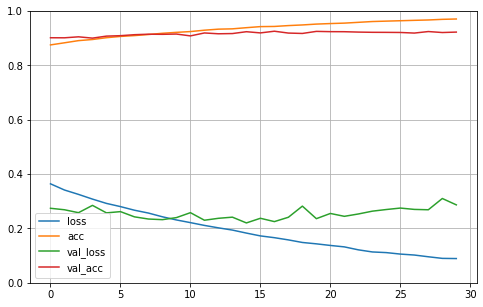

In [74]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


# ----------------------------------------------------- 
# Using the model to make predictions


In [76]:
X_new = X_test[:5]
y_pred = model.predict_classes(X_new)

np.array(Objects)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')